# SI 618 Homework 8

### The total points for this assignment is 100

## The data:

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Youtube Data
(https://www.kaggle.com/datasnaek/youtube-new)*
- Show code
- <b>Explain your answers </b>

###   Q1. For 20 Points: Compare the distributions of comments, views, likes, and dislikes

* Plot histograms for these metrics *for the US*. What can you say about them? (in 1-2 sentences) 
* Try to apply a log transformation, and plot the histograms again. How do they look now? (in 1-2 sentences)
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting? (in 1-2 sentences)
* Create additional pairplots for the other four regions. Do they look similar?

In total, you should have a short paragraph of about 4-6 sentences.

**Answer:**
These graphs, which shows the comments, views, likes and dislikes of the trending Youtube videos in US, are all skewed right. We see on the right side there are a few extremely data which means only a few number of popular videoes attract a large number of viewers. Now they look more like the normal distribution. From the pairplot of US, we can see a positively correlated relationsip between the views and like with relatively small variance.The Great Britain has a similar situation, but other regions don't have siginificant similar results. Instead, the comments number and likes are linear positively correlated in those area.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [104]:
youtube = pd.read_csv('youtube-new/USvideos.csv')
a = youtube.loc[:,['comment_count','views','likes','dislikes']]

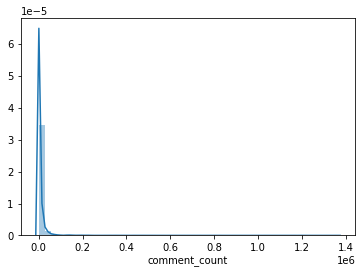

In [105]:
sns.distplot(a.comment_count)

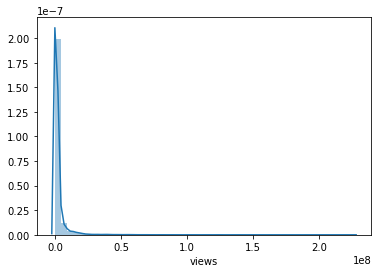

In [31]:
sns.distplot(a.views)

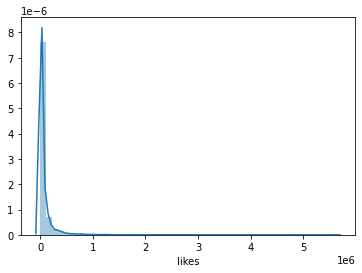

In [32]:
sns.distplot(a.likes)

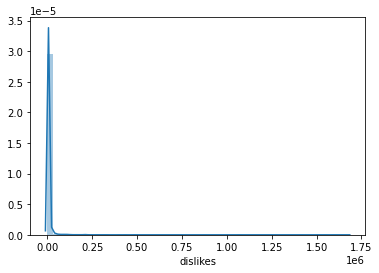

In [33]:
sns.distplot(a.dislikes)

In [106]:
lc = np.log(np.ma.array(a.comment_count))
lv = np.log(np.ma.array(a.views))
llk = np.log(np.ma.array(a.likes))
ldk = np.log(np.ma.array(a.dislikes))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


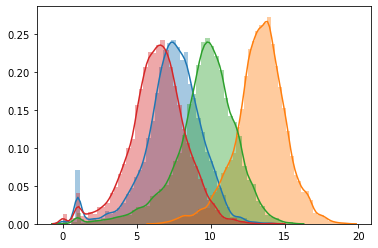

In [107]:
sns.distplot(lc)
sns.distplot(lv)
sns.distplot(llk)
sns.distplot(ldk)

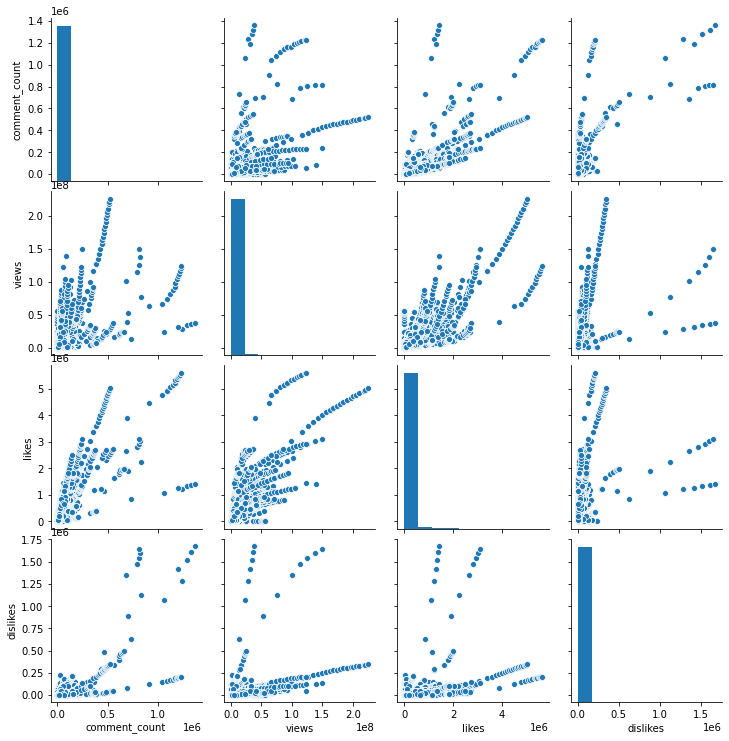

In [39]:
sns.pairplot(a)

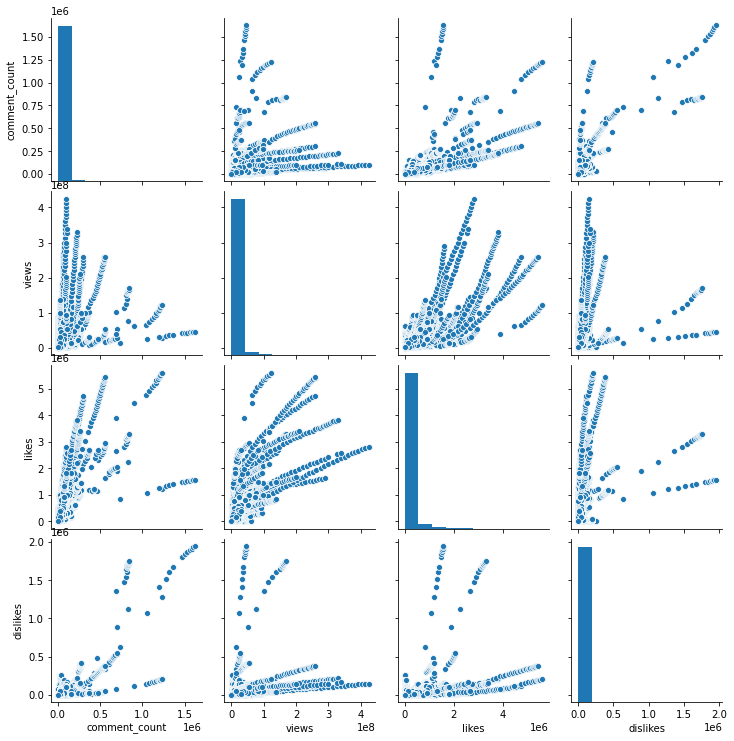

In [45]:
gb= pd.read_csv('youtube-new/GBvideos.csv')
b = gb.loc[:,['comment_count','views','likes','dislikes']]
sns.pairplot(b)

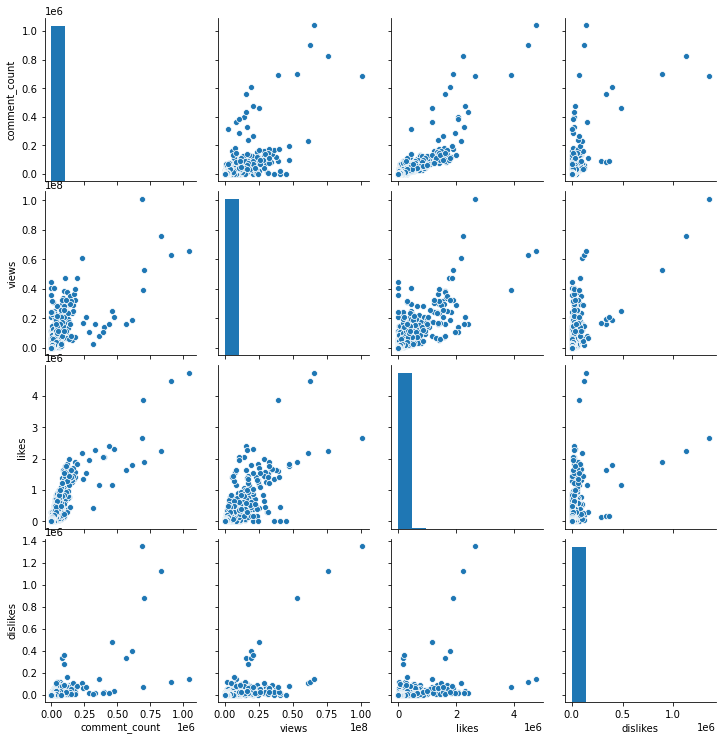

In [46]:
fr = pd.read_csv('youtube-new/FRvideos.csv')
c = fr.loc[:,['comment_count','views','likes','dislikes']]
sns.pairplot(c)

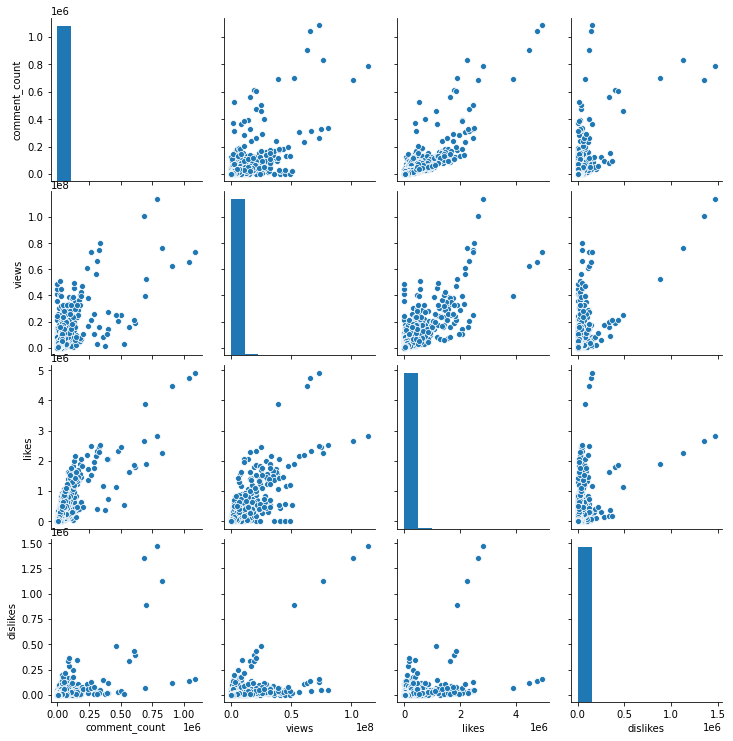

In [47]:
de = pd.read_csv('youtube-new/DEvideos.csv')
d = de.loc[:,['comment_count','views','likes','dislikes']]
sns.pairplot(d)

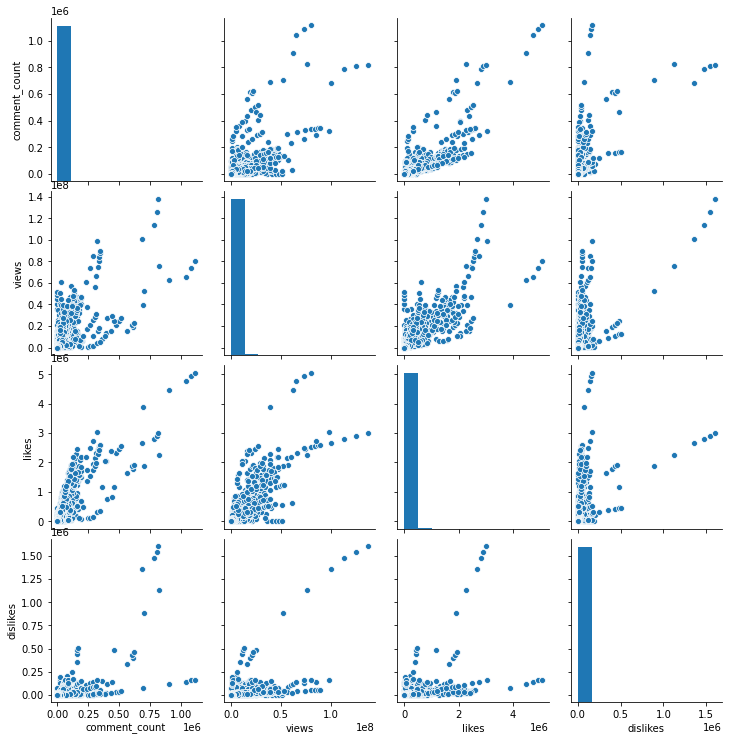

In [48]:
ca = pd.read_csv('youtube-new/CAvideos.csv')
e = ca.loc[:,['comment_count','views','likes','dislikes']]
sns.pairplot(e)

### Q2. For 15 Points: Create a heatmap of correlations between likes, dislikes, comment count and views

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they? Please explain in 2-3 sentences!

**Answer:**
We can find that views and likes are highest correlated(0.85) which means if a video with more views are more likely to get 'like'. However, the more views don't lead to more comments, but more likes or dislikes will do.

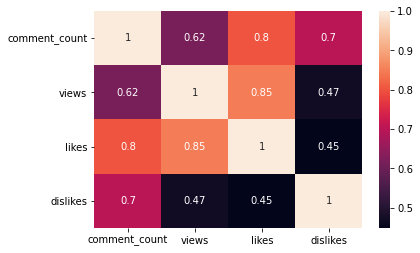

In [51]:
cor = a.corr()
sns.heatmap(cor,annot=True)

### Q3. For 20 points: Create and compare OLS models using variables of your choice, for a region of your choice
* Use statsmodels to perform an ANOVA (categorical regression) of a variable of your choice as the dependent variable (for example, views) and the video category as the independent variable. 
* Provide your interpretation of the results. 
* Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?

**Answer:**

1) The P-value is less than 0.05, so we will reject the null hypothesis under 95% confidence level. In other words, the impact of category on the number of views is statistically significant

2) I found that both likes and dislikes can affact the comment number, but the coefficient of likes is pretty small(0.12) and the coefficient of dislikes is very large around 0.92.It seems that people more likely to comment a video that they dislike.

In [88]:
pip install statsmodels

In [91]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [110]:
#us = youtube[['views','category_id']]
#ols_us = ols('views ~C(category_id)', us).fit()
#sm.stats.anova_lm(ols_us,type=2)

In [109]:
v = youtube['views']
c = youtube['category_id']
result = sm.OLS(v,c).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  views   R-squared (uncentered):                   0.052
Model:                            OLS   Adj. R-squared (uncentered):              0.052
Method:                 Least Squares   F-statistic:                              2238.
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                        0.00
Time:                        11:13:14   Log-Likelihood:                     -7.0666e+05
No. Observations:               40949   AIC:                                  1.413e+06
Df Residuals:                   40948   BIC:                                  1.413e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
category_id  8.272e+04   1748.734     47.305      0.000    7.93e+04    8.62e+04
==============================================================================
Omnibus:                    69990.246   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         84145574.662
Skew:                          11.844   Prob(JB):                         0.00
Kurtosis:                     223.808   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
v = youtube.comment_count
c = youtube.likes
result = sm.OLS(v,c).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          comment_count   R-squared (uncentered):                   0.661
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                          7.986e+04
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                        0.00
Time:                        11:29:57   Log-Likelihood:                     -4.6817e+05
No. Observations:               40949   AIC:                                  9.363e+05
Df Residuals:                   40948   BIC:                                  9.364e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
likes          0.1297      0.000    282.602      0.000       0.129       0.131
==============================================================================
Omnibus:                    95888.604   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1583994555.640
Skew:                          23.175   Prob(JB):                         0.00
Kurtosis:                     965.405   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
v = youtube.comment_count
c = youtube.dislikes
result = sm.OLS(v,c).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          comment_count   R-squared (uncentered):                   0.498
Model:                            OLS   Adj. R-squared (uncentered):              0.498
Method:                 Least Squares   F-statistic:                          4.056e+04
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                        0.00
Time:                        11:30:46   Log-Likelihood:                     -4.7623e+05
No. Observations:               40949   AIC:                                  9.525e+05
Df Residuals:                   40948   BIC:                                  9.525e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dislikes       0.9249      0.005    201.389      0.000       0.916       0.934
==============================================================================
Omnibus:                    86005.545   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        751910839.293
Skew:                          17.909   Prob(JB):                         0.00
Kurtosis:                     665.879   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)* </span>
- Show your code
- <b>Explain your answer <b>. 

### Q4. For 15 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.). 

* Which pairs have the most/least correlation coefficients?

**Answer:**
The highest correlation coefficient: Sp. Def and Defense
The lowest correlation coefficient: Speed and Defense

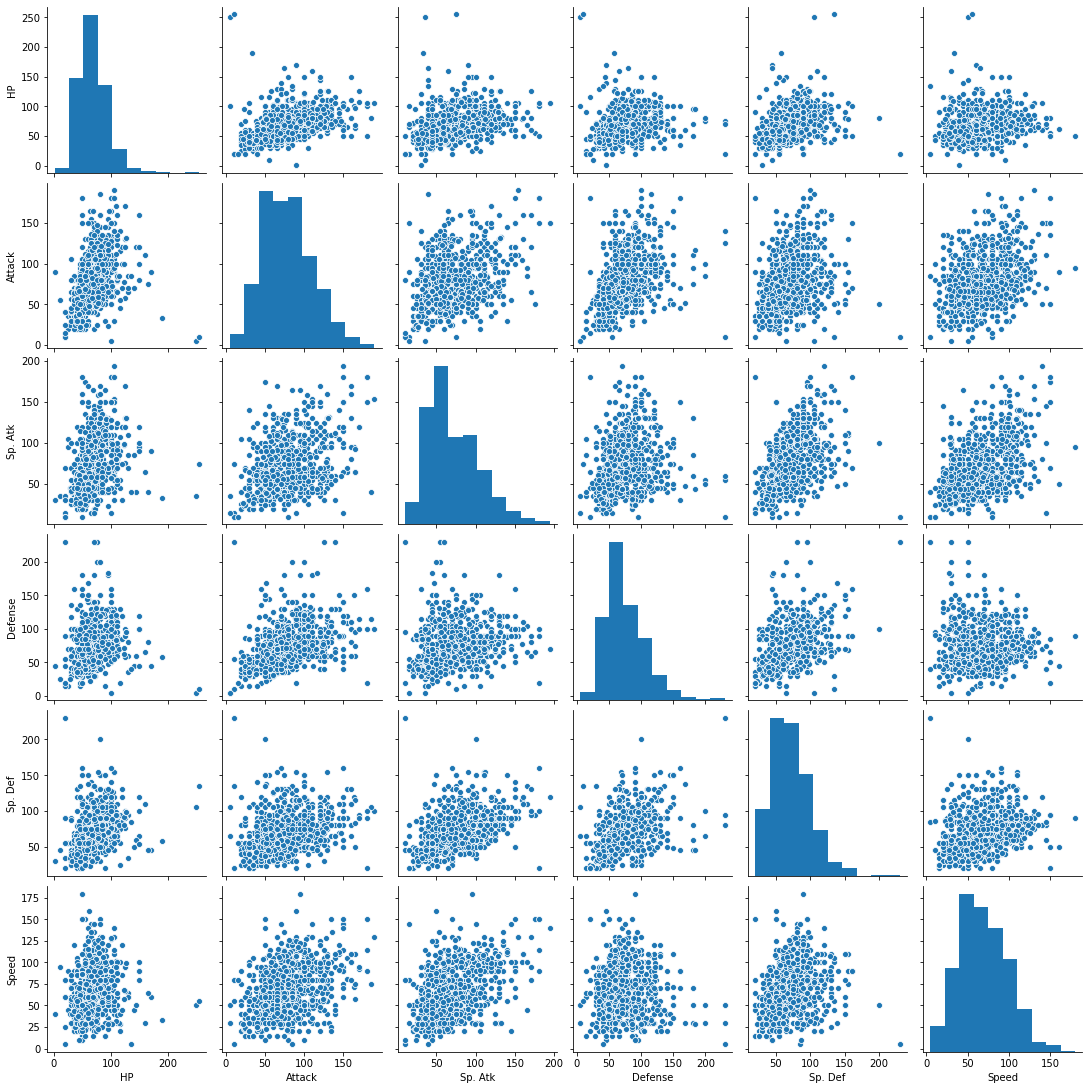

In [77]:
pkm = pd.read_csv('Pokemon.csv')
p = pkm.loc[:,['HP','Attack', 'Sp. Atk', 'Defense','Sp. Def','Speed']]
sns.pairplot(p)

In [114]:
p.corr()

,HP,Attack,Sp. Atk,Defense,Sp. Def,Speed
HP,1.000000,0.422386,0.362380,0.239622,0.378718,0.175952
Attack,0.422386,1.000000,0.396362,0.438687,0.263990,0.381240
Sp. Atk,0.362380,0.396362,1.000000,0.223549,0.506121,0.473018
Defense,0.239622,0.438687,0.223549,1.000000,0.510747,0.015227
Sp. Def,0.378718,0.263990,0.506121,0.510747,1.000000,0.259133
Speed,0.175952,0.381240,0.473018,0.015227,0.259133,1.000000


###  Q5. For 15 Points: Plot the distribution of ability points per Pokémon type 

* How would you describe each Pokémon type with different ability points? For simplicity, let's focus solely on pokemon that are type 1 (non-dual type pokemon)

**Answer:**
The most distributions of different ability points are generally follow the normal distribution, such as Grass, Water. Some ability points have significantly fat tails, like Ice, Steel, which means some Pokémons are excellent in those fields.

In [85]:
pkm.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Grass


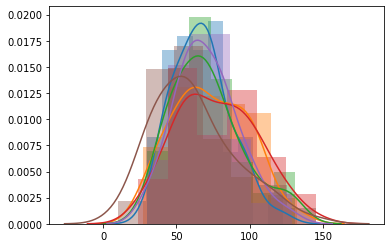

Fire


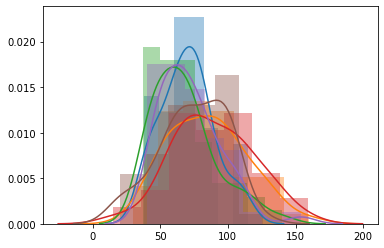

Water


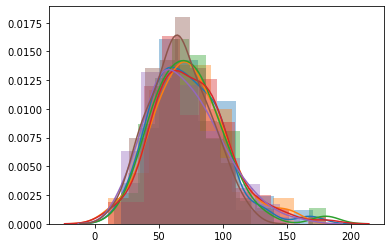

Bug


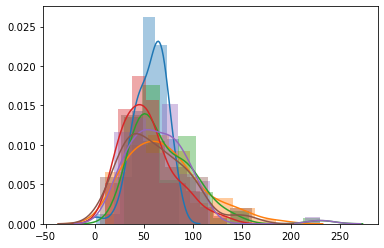

Normal


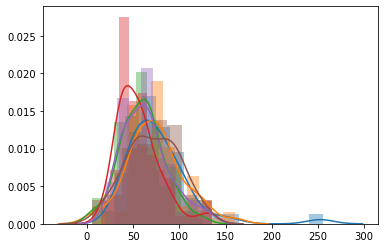

Poison


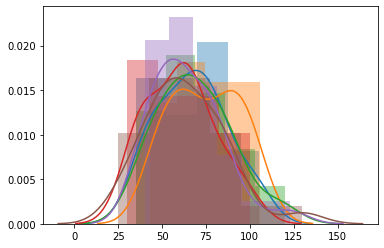

Electric


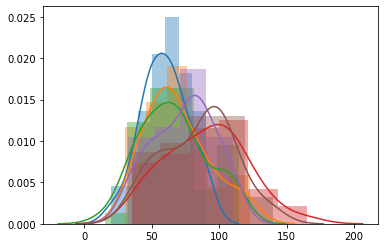

Ground


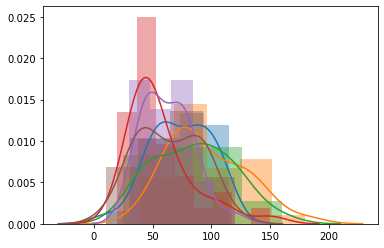

Fairy


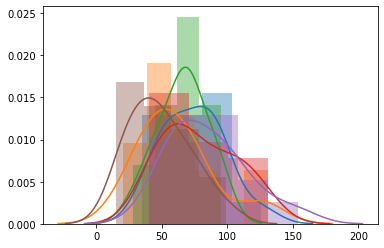

Fighting


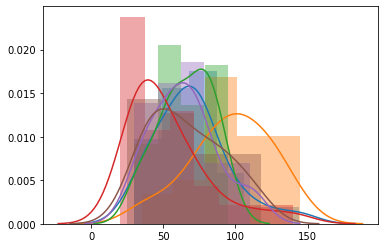

Psychic


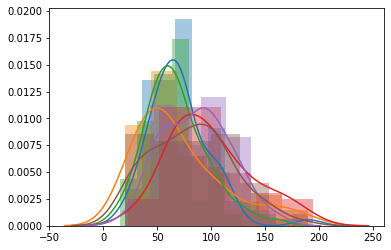

Rock


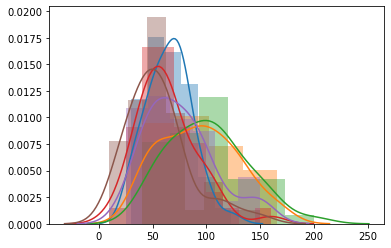

Ghost


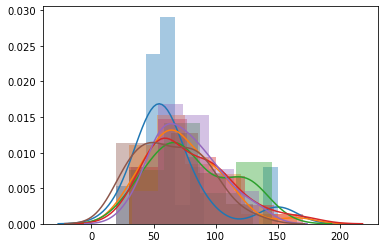

Ice


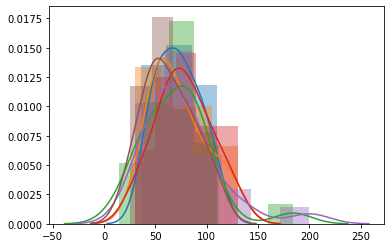

Dragon


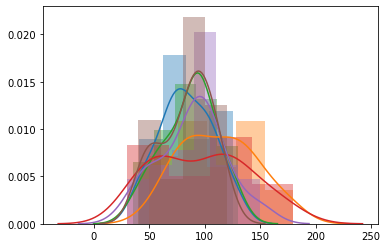

Dark


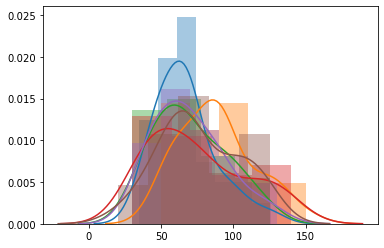

Steel


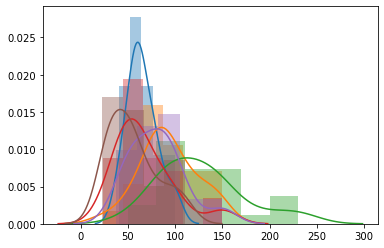

Flying


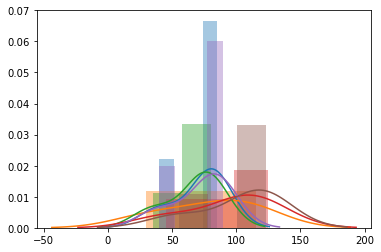

In [117]:
pk = pkm['Type 1'].unique().tolist()
for j in pk:
    i = pkm[pkm['Type 1'] == j]
    plt.figure(j)
    m = i[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
    sns.distplot(m[['HP']])
    sns.distplot(m[['Attack']])
    sns.distplot(m[['Defense']])
    sns.distplot(m[['Sp. Atk']])
    sns.distplot(m[['Sp. Def']])
    sns.distplot(m[['Speed']])
    print(j)
    plt.show(j)

### Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other?

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?
* Plot the distributions of abilities in different generations. Compare the results and explain your findings in 4-5 sentences.

**Answer:** 
No, it seems that all the distributions of generations are close to nornal distribution. The distribution of each ability point are quite similar in the generation 1, generation 2. However,there are a few ability point have different distribution in generation 3, and generation 6, and there are lost of difference among ability points in generation 4 and generation 5. So, the Pokémons in generation 1, 2 are grouped by their ability points, and the Pokémons in generation 3, 6 are highly likely assigned by ability points, but those in generation 4 and 5 are not gathered base on their abilities.

1


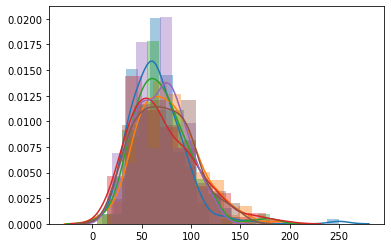

2


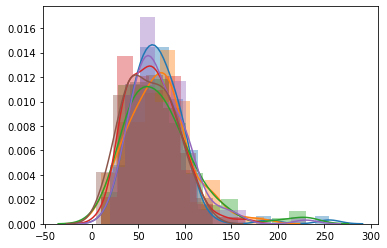

3


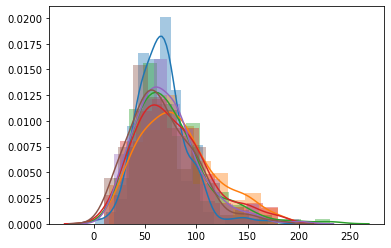

4


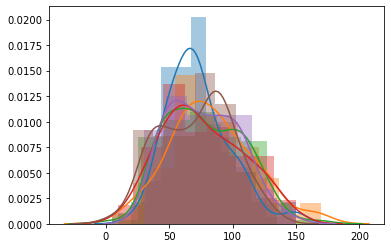

5


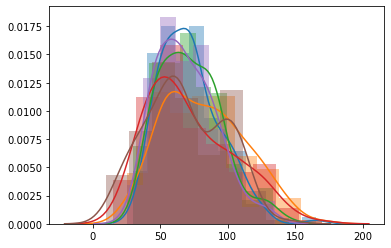

6


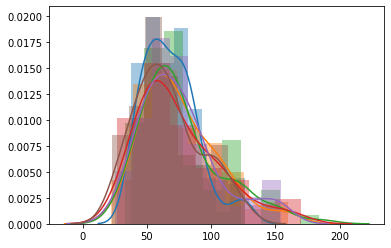

In [118]:
pk = pkm['Generation'].unique().tolist()
for j in pk:
    i = pkm[pkm['Generation'] == j]
    plt.figure(j)
    m = i[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
    sns.distplot(m[['HP']])
    sns.distplot(m[['Attack']])
    sns.distplot(m[['Defense']])
    sns.distplot(m[['Sp. Atk']])
    sns.distplot(m[['Sp. Def']])
    sns.distplot(m[['Speed']])
    print(j)
    plt.show(j)